<a href="https://colab.research.google.com/github/Fcazarez/RRC_Intro_AI_Project2/blob/main/Copy_of_Project2_Intro_AI_Random_Forest_Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP-3703 (241551) Introduction to Artificial Intelligence**
# **Project 2 - Random Forests and Ensembles**
# **Felix Cazarez**


**Objective:**
* The goal of the project is to successfully train and test
* a random forest,
* compare it to a decision tree and
* knn classifier.
* Also to train a simple stacking ensemble using a dt,
* knn and
* svm as base learners and
* a random forest as the meta-model.

**Instructions:**

* From the Caltech-UCSD CUB-200-2011 data set you will need image_attribute_labels.txt and image_class_labels.txt they can be found at the following links:

* http://www.vision.caltech.edu/datasets/cub_200_2011/
* https://drive.google.com/drive/folders/1kFzIqZL_pEBVR7Ca_8IKibfWoeZc3GT1


# **Task 1: Data Preprocessing**
* A correspondence should set up between the attributes and the labels. The aim is to set up a structure where each image's attributes can be related to its label.

By the end, there are separate numpy arrays for training/testing attributes and their corresponding labels.

In other words, your code takes two separate data sources – one with image attributes and the other with image labels – and processes them to form training and testing datasets where machine learning algorithms can learn the relationship between attributes and their corresponding labels.

## **1.1 The Data:**

* The first file "image_attribute_labels.txt" contains information about image attributes. It is read with space as a delimiter(‘\s+)
* Only the first three columns should be loaded (‘igid’,’attid’,’present’)
* The second file “image_class_labels.txt” has class labels for the image. It is read with space delimeter too.
* Output the heads of both files, and the file sizes/shapes. Discuss contents in detail.

## **1.2 Handling Bad Entries:**
* Occasionally, files may contain corrupted or wrongly formatted lines. We use the on_bad_lines='skip' argument to ensure such lines are skipped during loading.
* Use the pandas library to load the two text files, image_attribute_labels.txt and image_class_labels.txt. Name them imgatt, and imglabels, respectively.
* Always inspect the loaded data using methods like head(), info(), or describe() to understand its structure and to identify any inconsistencies.
* Output shape, and head of the image attributes

In [ ]:
#Importing libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import ( train_test_split,
                                      cross_val_score,
                                      GridSearchCV
                                    )
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate

In [ ]:
#!pip install --upgrade google-colab

In [ ]:
#folder was downloaded and uploaded to my gdrive to be recovered here in this notebook with python
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)

Mounted at /content/gdrive


In [ ]:
# Define the base directory
base_directory = '/content/gdrive/MyDrive/Colab Notebooks/CUB_200_2011/'

# Define file paths
path_image_attr_abels = f'{base_directory}attributes/image_attribute_labels.txt'
path_class_labels = f'{base_directory}image_class_labels.txt'


In [ ]:

# Read the first file (image attributes)
imgatt = pd.read_csv(path_image_attr_abels, sep='\s+', usecols=[0, 1, 2], on_bad_lines='skip', names=["imgid", "attid", "present"])


In [ ]:
# Display the first few rows of the image attributes DataFrame
print("=" * 30 + " Attributes " + "=" * 30)

print("Shape of image_attribute_labels.txt :", imgatt.shape)
print(" Head " + "=" * 30)
print("head of the data:", imgatt.head())
print(" Describe " + "=" * 30)
print(imgatt.describe().round(2))

============================== Attributes ==============================
Shape of image_attribute_labels.txt : (3677856, 3)
 Head ==============================
head of the data:    imgid  attid  present
0      1      1        0
1      1      2        0
2      1      3        0
3      1      4        0
4      1      5        1
 Describe ==============================
            imgid       attid    present
count  3677856.00  3677856.00  3677856.0
mean      5894.50      156.50        0.1
std       3402.90       90.07        0.3
min          1.00        1.00        0.0
25%       2947.75       78.75        0.0
50%       5894.50      156.50        0.0
75%       8841.25      234.25        0.0
max      11788.00      312.00        1.0


In [ ]:

# Read the second file (class labels)
imglabels = pd.read_csv(path_class_labels, header=None, sep='\s+', on_bad_lines='skip', names=["imgid", "classid"])

In [ ]:
# Display the first few rows of the class labels DataFrame
print("=" * 30 + " Labels " + "=" * 30)
print("Shape of image_class_labels.txt :", imglabels.shape)
print(" Head " + "=" * 30)
print(imglabels.head())
print(" Describe " + "=" * 30)
print(imglabels.describe().round(2))

============================== Labels ==============================
Shape of image_class_labels.txt : (11788, 2)
 Head ==============================
   imgid  classid
0      1        1
1      2        1
2      3        1
3      4        1
4      5        1
 Describe ==============================
          imgid   classid
count  11788.00  11788.00
mean    5894.50    101.13
std     3403.05     57.48
min        1.00      1.00
25%     2947.75     51.00
50%     5894.50    101.00
75%     8841.25    151.00
max    11788.00    200.00


**Comments:**

**Attributes:**

* Shape of the image_attribute_labels.txt file: (3677856, 3)
* The dataset contains a large number of records (3677856).
* The present column indicates whether a specific attribute is present (1) or not (0) for an image.
* The dataset is quite sparse, with a mean of 0.1 and a standard deviation of 0.3.
* This suggests that most attributes are not present in the images.

For the attributes, it appears that the majority of attributes are not present in the images, as indicated by the low mean value and high standard deviation.

**Labels:**

* Shape of the image_class_labels.txt file: (11788, 2)
* There are 11788 unique images in the dataset.
* The class labels range from 1 to 200, and the mean class label is approximately 101.13.
* The dataset is relatively evenly distributed among classes, with a minimum class label of 1 and a maximum of 200.

For the labels, the dataset contains a diverse set of images distributed across 200 classes, with a relatively even distribution among classes.

In [ ]:
# Check  duplicate
imgatt.drop_duplicates(inplace=True)
imglabels.drop_duplicates(inplace=True)
print("=" * 30 + " Attributes " + "=" * 30)
print(imgatt.info())
print("=" * 30 + " Labels " + "=" * 30)
print(imglabels.info())

============================== Attributes ==============================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677856 entries, 0 to 3677855
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   imgid    int64
 1   attid    int64
 2   present  int64
dtypes: int64(3)
memory usage: 112.2 MB
None
============================== Labels ==============================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11788 entries, 0 to 11787
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   imgid    11788 non-null  int64
 1   classid  11788 non-null  int64
dtypes: int64(2)
memory usage: 276.3 KB
None


## **1.3 Data Transformation:**
* The data from image_attribute_labels.txt needs to be transformed from a long format to a wide format.
* The pivot method in pandas will help transform the data such that each image ID has all the attributes associated with it in separate columns.
* Make sure there are no duplicates or pivot will give you an error.
* Name this imgatt2.
* Output the head of the new arrangement; and the number of rows and columns

In [ ]:
# Pivot the data to wide format
#This code uses the .pivot() method from the pandas library to transform the imgatt DataFrame from a long format to a wide format.
#The index parameter specifies that the 'imgid' column should be used as the index (rows) in the new DataFrame.
#The columns parameter specifies that the 'attid' column values should be used as columns in the new DataFrame.
#The values parameter specifies that the 'present' column values should be placed in the corresponding cells of the new DataFrame.
imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')

# Output the head of the new arrangement
print("=" * 30 + " Attributes 2 (wide format) " + "=" * 30)
print(imgatt2.head())

# Number of rows and columns
num_rows, num_columns = imgatt2.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


============================== Attributes 2 (wide format) ==============================
attid  1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    1    0    0    0    0    0  ...    0    0    1   

attid  306  307  308  309  310  311  312  
imgid                                     
1        0    0    1    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    1    0  
4        1    0    0    1    0    0    0  
5        0    0    0    0    0    0    0  

[5 rows x 312 columns]
Number of rows: 11788
Number of 

In [ ]:
# Check duplicates
imgatt2.drop_duplicates(inplace=True)
imglabels.drop_duplicates(inplace=True)

In [ ]:
# Check Nan
imgatt2.dropna(inplace=True)
imglabels.dropna(inplace=True)

In [ ]:
print(imgatt2.info())
print(imglabels.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11757 entries, 1 to 11788
Columns: 312 entries, 1 to 312
dtypes: int64(312)
memory usage: 28.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11788 entries, 0 to 11787
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   imgid    11788 non-null  int64
 1   classid  11788 non-null  int64
dtypes: int64(2)
memory usage: 276.3 KB
None


## **1.4 Data Merging and Shuffle:**
* Set your imglabels data index to “imgid"
* Merge the two dataframes on a common column, "imgid" to create a new dataframe
* Randomly shuffle your dataframe using .sample with frac=1, and random_state=10. (I want this reproducible)
* Split your new dataframe into attributes and labels where your attributes contains all columns but the last. Your labels contain only the last column.
* Using .iloc is useful here as it preserves indexing.
* Convert to a numpy arrays
* Flatten your labels

In [ ]:
random_seed = 42
np.random.seed(random_seed) # this seed make it reproductible

# Set the index for imglabels data to "imgid"
imglabels.set_index("imgid", inplace=True)

# Merge the two dataframes using the column "imgid"
merged_df = pd.merge(imgatt2, imglabels, on="imgid")

# Randomly shuffle the df
shuffled_data = merged_df.sample(frac=1, random_state=random_seed)  # Use the same seed

# Split df into attributes and labels
attributes = shuffled_data.iloc[:, :-1]
labels = shuffled_data.iloc[:, -1]

# Convert to numpy arrays
attributes_np_array = attributes.values
labels_np_array = labels.values

# Flatten the labels
labels_flatten = labels_np_array.flatten()

print("Shape of attributes_array:", attributes_np_array.shape)
print("Shape of labels_array:", labels_flatten.shape)


Shape of attributes_array: (11757, 312)
Shape of labels_array: (11757,)


# **2. Training and Testing Sets**
* Create your training and testing sets.

In [ ]:
# We will use the train_test_split function from sklearn to split our data into training and testing sets.
# We are reserving 20% of the data for testing.
# The random_state parameter ensures that the splits generate are reproducible.
X_train, X_test, y_train, y_test = train_test_split(attributes_np_array, labels_flatten, test_size=0.2, random_state=42)

# Let's print the shapes of our training and testing sets to verify everything is as expected.
print("Training and testing set split successful!")
print(f"Shape of X_train (training data): {X_train.shape}")
print(f"Shape of X_test (testing data): {X_test.shape}")
print(f"Shape of y_train (training labels): {y_train.shape}")
print(f"Shape of y_test (testing labels): {y_test.shape}")


Training and testing set split successful!
Shape of X_train (training data): (9405, 312)
Shape of X_test (testing data): (2352, 312)
Shape of y_train (training labels): (9405,)
Shape of y_test (testing labels): (2352,)


# **3.Random Forest Classifier:**
* Implement a Random Forest classifier. With max features=15, and 25 trees.
* Train the classifier on the training data and test its performance on the testing data.
* Print the training and testing accuracies. What do the scores suggest?

In [ ]:
# Create a Random Forest classifier with specific parameters
rf_classifier = RandomForestClassifier(max_features=15, n_estimators=25, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict labels on both the training and testing data
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.383078231292517


**Comments:**

The model is overfited, the training accurracy is quite better than the testng accurracy.

# **4. Confusion Matrix:**
* Generate a confusion matrix for the Random Forest classifier's predictions on the test data.
* Visualize this matrix (you may need to implement or use a utility function for visualization).

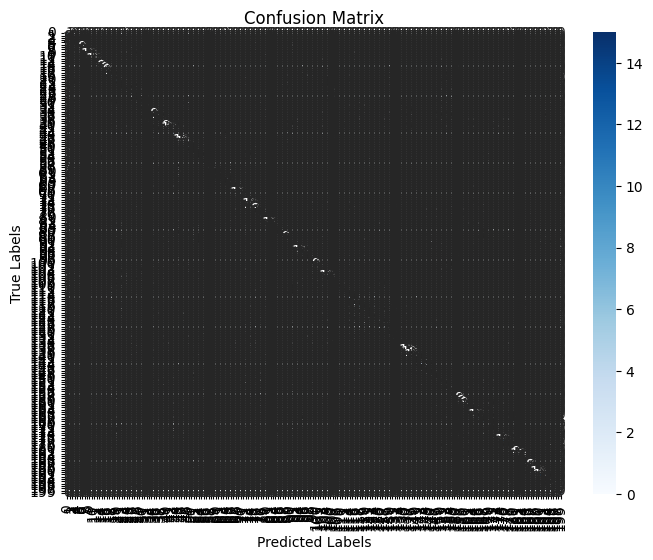

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**Confusion Matrix Comments:**

* The top-left cell (element 0,0) represents the count of True Negatives (TN).
* The top-right cell (element 0,1) represents the count of False Positives (FP).
* The bottom-left cell (element 1,0) represents the count of False Negatives (FN).
* The bottom-right cell (element 1,1) represents the count of True Positives (TP).

The "line" appearance suggests that the model is making mostly correct predictions. The dark background may be due to the color map choice and indicates higher counts in the True Positive and True Negative cells, which is a positive sign as these are the correctly classified instances. The combination of these factors shows that the model is performing well on the test data.

# **5.Model Comparisons:**
* KNN:
  - Implement a K-Nearest Neighbors (KNN) classifier.
  - Train and test the KNN model.
  - Output the test results.
* Decision Tree:
  - Implement a Decision Tree classifier.
  - Train and test the Decision Tree model.
  - Output the test results.
* Compare the performance of the Random Forest, KNN, and Decision Tree models and report their accuracies.

In [ ]:
# find the best k to put in the model (values from 1 to 29)
k_values = list(range(1, 30))

mean_accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    #  cross-validation with 5 folds
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')

    mean_accuracy = scores.mean()

    mean_accuracy_scores.append(mean_accuracy)

best_k = k_values[mean_accuracy_scores.index(max(mean_accuracy_scores))]

print("Best k:", best_k)


Best k: 14


In [ ]:
results_bestk = pd.DataFrame({'k': k_values, 'Mean Accuracy': mean_accuracy_scores})

print(results_bestk)

     k  Mean Accuracy
0    1       0.305190
1    2       0.280520
2    3       0.290835
3    4       0.303276
4    5       0.315185
5    6       0.319120
6    7       0.326457
7    8       0.324649
8    9       0.326990
9   10       0.326776
10  11       0.328265
11  12       0.326246
12  13       0.328584
13  14       0.330923
14  15       0.327308
15  16       0.327095
16  17       0.327202
17  18       0.324863
18  19       0.326245
19  20       0.321885
20  21       0.321885
21  22       0.322204
22  23       0.321035
23  24       0.323373
24  25       0.319227
25  26       0.320502
26  27       0.320609
27  28       0.317631
28  29       0.319864


In [ ]:
# model KNN  with k = 14, defined as a best k in the code before
knn_classifier = KNeighborsClassifier(n_neighbors=14)

# train the KNN
knn_classifier.fit(X_train, y_train)

# run the KNN with testing data
y_train_pred_knn = knn_classifier.predict(X_train)
y_test_pred_knn = knn_classifier.predict(X_test)


#  training and testing accuracies
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)


In [ ]:
print("Training Accuracy knn:", train_accuracy_knn)
print("Testing Accuracy knn:", test_accuracy_knn)

Training Accuracy knn: 0.45714589536367506
Testing Accuracy knn: 0.3307823129251701


### Decision Tree

In [ ]:
# model without hyperparameters
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# traning
decision_tree_classifier.fit(X_train, y_train)

# run the decision tree with testing data
y_train_pred_dt = decision_tree_classifier.predict(X_train)
y_test_pred_dt = decision_tree_classifier.predict(X_test)

#  training and testing accuracies
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

In [ ]:
print("Training Accuracy dt:", train_accuracy_dt)
print("Testing Accuracy dt:", test_accuracy_dt)

Training Accuracy dt: 1.0
Testing Accuracy dt: 0.2699829931972789


In [ ]:
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

results_all_dt = pd.DataFrame(columns=["max_depth", "min_samples_split", "min_samples_leaf", "Train Accuracy", "Test Accuracy"])

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            decision_tree_classifier = DecisionTreeClassifier(
                random_state=42,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )

            # training
            decision_tree_classifier.fit(X_train, y_train)

            # prediction training data
            y_train_pred = decision_tree_classifier.predict(X_train)

            # accuracy training data
            train_accuracy = accuracy_score(y_train, y_train_pred)

            # prediction testing data
            y_test_pred = decision_tree_classifier.predict(X_test)

            # accuracy testing data
            test_accuracy = accuracy_score(y_test, y_test_pred)

            results_all_dt = results_all_dt.append({"max_depth": max_depth,
                                            "min_samples_split": min_samples_split,
                                            "min_samples_leaf": min_samples_leaf,
                                            "Train Accuracy": train_accuracy,
                                            "Test Accuracy": test_accuracy}, ignore_index=True)

table_result_dt = tabulate(results_all_dt, headers='keys', tablefmt='pretty', showindex=False)

print(table_result_dt)

<ipython-input-98-872b0f4b98e3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all_dt = results_all_dt.append({"max_depth": max_depth,
<ipython-input-98-872b0f4b98e3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all_dt = results_all_dt.append({"max_depth": max_depth,
<ipython-input-98-872b0f4b98e3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all_dt = results_all_dt.append({"max_depth": max_depth,
<ipython-input-98-872b0f4b98e3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all_dt = results_all_dt.append({"max_depth": max_depth,
<ipython-input-98-872b0f4b98e3>:32: FutureWarning: The frame

+-----------+-------------------+------------------+---------------------+---------------------+
| max_depth | min_samples_split | min_samples_leaf |   Train Accuracy    |    Test Accuracy    |
+-----------+-------------------+------------------+---------------------+---------------------+
|    5.0    |        2.0        |       1.0        | 0.0777328796256912  | 0.05442176870748299 |
|    5.0    |        2.0        |       2.0        | 0.07741386643981285 | 0.05357142857142857 |
|    5.0    |        2.0        |       4.0        | 0.07730752871118673 | 0.05442176870748299 |
|    5.0    |        5.0        |       1.0        | 0.0777328796256912  | 0.05442176870748299 |
|    5.0    |        5.0        |       2.0        | 0.07741386643981285 | 0.05357142857142857 |
|    5.0    |        5.0        |       4.0        | 0.07730752871118673 | 0.05442176870748299 |
|    5.0    |       10.0        |       1.0        | 0.0777328796256912  | 0.05442176870748299 |
|    5.0    |       10.0      

<ipython-input-98-872b0f4b98e3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_all_dt = results_all_dt.append({"max_depth": max_depth,


According to the hyperparameters, this is the best model
* max_depth = 15.0
* min_samples_split = 2.0
* min_samples_leaf = 1.0

* accuracy values:

* Train Accuracy: 0.4172692471288813
* Test Accuracy: 0.23001700680272108

In [ ]:
# model with best hyperparameters
decision_tree_classifier_hyper = DecisionTreeClassifier(
    random_state=42,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1
)

# Training the model with hyperparameters
decision_tree_classifier_hyper.fit(X_train, y_train)

y_train_pred_dt_hyper = decision_tree_classifier_hyper.predict(X_train)
y_test_pred_dt_hyper = decision_tree_classifier_hyper.predict(X_test)

train_accuracy_dt_hyper = accuracy_score(y_train, y_train_pred_dt_hyper)
test_accuracy_dt_hyper = accuracy_score(y_test, y_test_pred_dt_hyper)


In [ ]:
print("------> Decision Tree Model with Hyperparameters:")
print("Training Accuracy (With Hyperparameters):", train_accuracy_dt_hyper)
print("Testing Accuracy (With Hyperparameters):", test_accuracy_dt_hyper)

------> Decision Tree Model with Hyperparameters:
Training Accuracy (With Hyperparameters): 0.4172692471288813
Testing Accuracy (With Hyperparameters): 0.23001700680272108


Compare the performance of the Random Forest, KNN, and Decision Tree models and report their accuracies.

In [ ]:
# Print the test accuracies for all three models
print("----------> Random Forest")
print("Random Forest Training Accuracy:", train_accuracy)
print("Random Forest Test Accuracy:", test_accuracy)
print("")

print("----------> KNN")
print("KNN Training Accuracy:", train_accuracy_knn)
print("KNN Test Accuracy:", test_accuracy_knn)
print("")

print("----------> Decision Tree")
print("Decision Tree Training Accuracy:", train_accuracy_dt)
print("Decision Tree Test Accuracy:", test_accuracy_dt)
print("")

print("----------> Decision Tree with Hyperparameters")
print("Decision Tree Training hyper Accuracy:", train_accuracy_dt_hyper)
print("Decision Tree Test hyper Accuracy:", test_accuracy_dt_hyper)


----------> Random Forest
Random Forest Training Accuracy: 0.33719693747341556
Random Forest Test Accuracy: 0.23171768707482993

----------> KNN
KNN Training Accuracy: 0.45714589536367506
KNN Test Accuracy: 0.3307823129251701

----------> Decision Tree
Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.2699829931972789

----------> Decision Tree with Hyperparameters
Decision Tree Training hyper Accuracy: 0.4172692471288813
Decision Tree Test hyper Accuracy: 0.23001700680272108


Comments:

* Random Forest


The Random Forest model exhibits a high training accuracy that can be considered (overfitting) specially because the test data have a low acuracy, but its testing accuracy is the highest among the three models when comparing the other models.


* K-nearest neighbors (KNN)


The KNN model has moderate training accuracy and slightly lower testing accuracy than Random Forest. This suggests that KNN may not be the best choice for this dataset.


* Decision tree


The Decision Tree model demonstrates high training accuracy that can be considered (overfitting) and lower testing accuracy among the three models, indicating poor generalization.


* Decision Tree with hyperparameters

The Decision Tree model with hyperparameters shows improved testing accuracy compared to the Decision Tree without hyperparameters and we can't see overfitting. However, it still behind the Random Forest and KNN models in terms of testing accuracy.


## Question 6 Cross-Validation

In [ ]:
# Define the models (assuming you've already trained them)
models = [
    ("Random Forest", rf_classifier),
    ("KNN", knn_classifier),
    ("Decision Tree", decision_tree_classifier),
    ("Decision Tree hyperparameter", decision_tree_classifier_hyper),

]

#  5-fold cross-validation for each model
for model_name, model in models:
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # average accuracy and standard deviation
    avg_accuracy = np.mean(cross_val_scores)
    std_accuracy = np.std(cross_val_scores)

    print(f"Model: {model_name}")
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Standard Deviation: {std_accuracy:.4f}")
    print()

Model: Random Forest
Average Accuracy: 0.4547
Standard Deviation: 0.0095

Model: KNN
Average Accuracy: 0.3199
Standard Deviation: 0.0083

Model: Decision Tree
Average Accuracy: 0.2202
Standard Deviation: 0.0081

Model: Decision Tree hyperparameter
Average Accuracy: 0.2148
Standard Deviation: 0.0092



The Random Forest model has the highest average accuracy, followed by KNN. Both Decision Tree models have lower average accuracies, with the Decision Tree without hyperparameters having a slightly higher average accuracy.

\
The lower standard deviations indicate that there was not much difference in cross validation, the performance was constant and consistent.

\

Evaluating the models, Random Forest appears to be the best based on average accuracy and lowest standard deviation

## Question 7 Hyperparameter Tuning

In [ ]:
# # parameter grid for max_features(5 to 50 in steps of 5) and n_estimators( 10 to 200 in steps of 10)
# # takes a LONG time to execute
# param_grid = {
#     'max_features': np.arange(5, 51, 5),
#     'n_estimators': np.arange(10, 201, 10)
# }

In [ ]:
# Reduced parameter grid for max_features and n_estimators
param_grid = {
    'max_features': [5, 10, 15, 20],
    'n_estimators': [50, 100, 150]
}

In [ ]:
rf_classifier_2 = RandomForestClassifier(random_state=42)


In [ ]:
# create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier_2, param_grid=param_grid, cv=5, scoring='accuracy')

# fit grid search to traning data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_features': 10, 'n_estimators': 150}


In [ ]:
# Extract grid search results
results = grid_search.cv_results_
max_features_values = results['param_max_features']
n_estimators_values = results['param_n_estimators']
accuracies = results['mean_test_score']

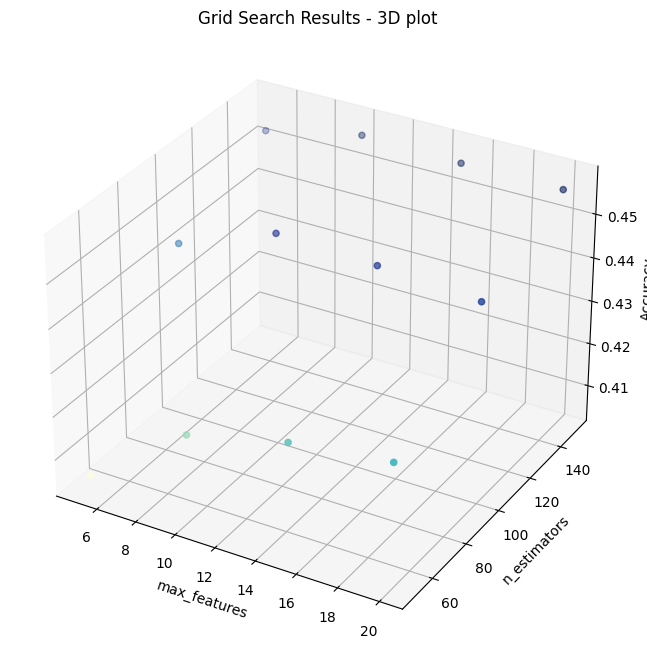

In [ ]:
# Create a 3D  plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(max_features_values, n_estimators_values, accuracies, c=accuracies, cmap='YlGnBu')

# Set axis labels
ax.set_xlabel('max_features')
ax.set_ylabel('n_estimators')
ax.set_zlabel('Accuracy')

plt.title('Grid Search Results - 3D plot')
plt.show()


In [ ]:
# best parameters
best_max_features = best_params['max_features']
best_n_estimators = best_params['n_estimators']

rf_classifier_optimized = RandomForestClassifier(max_features=best_max_features, n_estimators=best_n_estimators, random_state=42)
rf_classifier_optimized.fit(X_train, y_train)

# predict
y_train_pred_rf_optimized = rf_classifier_optimized.predict(X_train)
y_test_pred_rf_optimized = rf_classifier_optimized.predict(X_test)

# Calculate the accuracy of the optimized Random Forest model
accuracy_rf_optimized_train = accuracy_score(y_train, y_train_pred_rf_optimized)
accuracy_rf_optimized_test = accuracy_score(y_test, y_test_pred_rf_optimized)

In [ ]:
# Output the test results for the optimized model
print("Optimized Random Forest Train Accuracy:", accuracy_rf_optimized_train)
print("Optimized Random Forest Test Accuracy:", accuracy_rf_optimized_test)

Optimized Random Forest Train Accuracy: 1.0
Optimized Random Forest Test Accuracy: 0.46938775510204084


## Question 8 Stacking Ensemble

In [ ]:
# Initialize base learners
base_learners = [
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(kernel='linear', random_state=42))
]

# init stacking ensemble with a random forest as the meta-model
stacking_ensemble = RandomForestClassifier(random_state=42)

# Train base learners on the training data
for learner_name, learner_model in base_learners:
    learner_model.fit(X_train, y_train)

# predictions from base learners for training and test data
train_predictions = []
test_predictions = []
for learner_name, learner_model in base_learners:
    train_predictions.append(learner_model.predict(X_train))
    test_predictions.append(learner_model.predict(X_test))

#  predictions for training and test data
X_train_stacked = np.column_stack(train_predictions)
X_test_stacked = np.column_stack(test_predictions)

# train the meta-model on the stacked features
stacking_ensemble.fit(X_train_stacked, y_train)

#  predictions on the test data using the stacking ensemble
y_test_pred_stacking = stacking_ensemble.predict(X_test_stacked)

# accuracy of the stacking ensemble on the test data
accuracy_stacking = accuracy_score(y_test, y_test_pred_stacking)

print("Stacking Ensemble Test Accuracy:", accuracy_stacking)


Stacking Ensemble Test Accuracy: 0.3494897959183674


In [ ]:
all_results = [
    ["Random Forest ", test_accuracy],
    ["Random Forest Optimized", accuracy_rf_optimized_test],
    ["KNN", test_accuracy_knn],
    ["Decision Tree", test_accuracy_dt],
    ["Decision Tree with hyperp", test_accuracy_dt_hyper],
    ["Stacking Ensemble", accuracy_stacking]
]

# Create a table with the results
table = tabulate(all_results, headers=["Model", "Test Accuracy"], tablefmt="grid")

# Display the table
print(table)


+---------------------------+-----------------+
| Model                     |   Test Accuracy |
+===========================+=================+
| Random Forest             |        0.231718 |
+---------------------------+-----------------+
| Random Forest Optimized   |        0.469388 |
+---------------------------+-----------------+
| KNN                       |        0.330782 |
+---------------------------+-----------------+
| Decision Tree             |        0.269983 |
+---------------------------+-----------------+
| Decision Tree with hyperp |        0.230017 |
+---------------------------+-----------------+
| Stacking Ensemble         |        0.34949  |
+---------------------------+-----------------+
